# reading in data

In [1]:
# So we are just importing our data, it should have worked fine from the website, 
# but it was freaking out and i just download the data and have it locally but nothing else changes
import pandas as pd

data = pd.read_csv('Malware-staDyn-data.csv')

# just so we can see some of the data 
print(data.shape[0])
data.head()


6248


,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,count_file_written,count_file_exists,count_file_deleted,count_file_copied,count_file_renamed,count_regkey_written,count_regkey_deleted,count_file_opened,count_dll_loaded,label
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# yup  what we wanted to see
data['label'].value_counts()

1    5653
0     595
Name: label, dtype: int64

# Unbalanced Original data

([<matplotlib.patches.Wedge at 0x248205f40d0>,
 [Text(-1.051137863151662, 0.324205479054501, 'malware'),
  Text(1.0511378783288143, -0.3242054298471861, 'benign')])

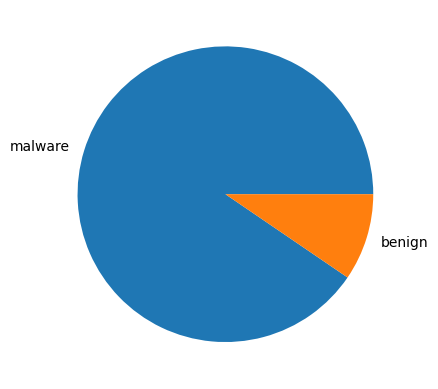

In [3]:
# Our pie chart  
import matplotlib.pyplot as plt

labels = 'malware', 'benign'

fig, ax = plt.subplots()
ax.pie(data['label'].value_counts(), labels = labels)

In [4]:
# create a table to hold output
column_names = ['Algo', 'Balance Strategy', 'Parameters', 'Accuracy', 'AUC', 'F1-Score', 'Precision', 'Recall']
df = pd.DataFrame(columns=column_names)
# df

# splitting data into training and testing

In [5]:
# splitting the data unbalnced 
from sklearn.model_selection import train_test_split

# our unbalanced training data, random stat just makes us get the same random numbers each time??
(train, test) = train_test_split(data, train_size=0.66, test_size=0.34, shuffle = True, random_state=42)

# just wanted to see that it was split 
print(train.shape)
print(test.shape)

# and how it split
# ub_train.head()
# ub_test.head()
print(train['label'].value_counts())
print(test['label'].value_counts())


(4123, 1085)
(2125, 1085)
1    3749
0     374
Name: label, dtype: int64
1    1904
0     221
Name: label, dtype: int64


# Tree With Unbalanced training data

In [6]:
# making our tree model 
from sklearn import tree

# splitting the classifier from the rest of the data 
X_train = train.drop(['label'], axis=1)
Y_train = train['label']

# make our decision tree 
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, Y_train)

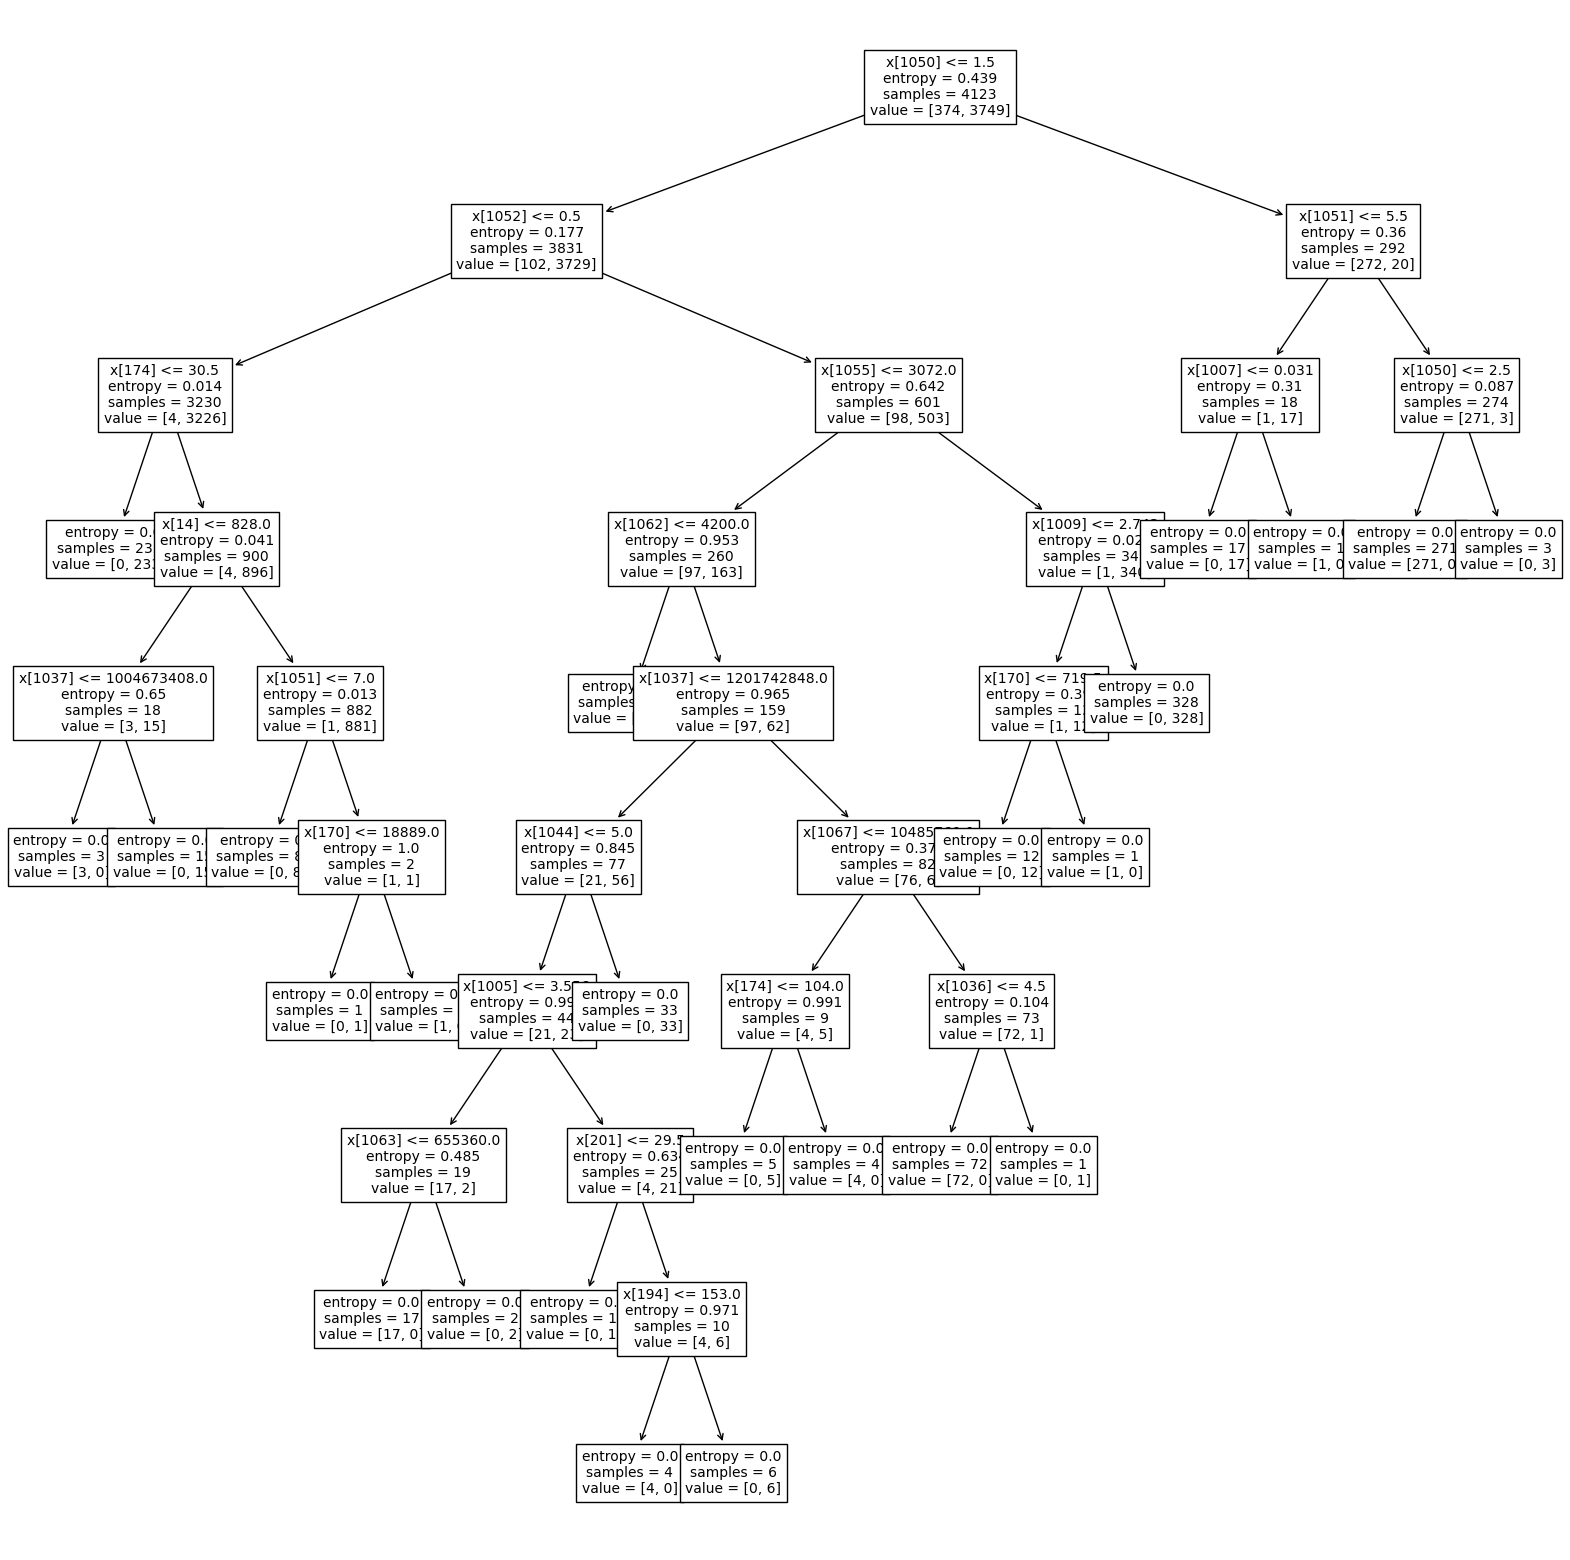

In [7]:
# plot our decision tree, don't think we needed to plot this tree but I didn't realize that till after I did it
# and erasing it seems odd
plt.figure(figsize=(20,20))
tree.plot_tree(clf, fontsize=10)
plt.show()

In [8]:
# so it probably overfit the model 
print(clf.score(X_train, Y_train))


1.0


# Choosing best Features

In [9]:
# Seems to be a built in way of checking which features are most important
clf.feature_importances_  
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
print(feat_importances.nlargest(5))
# feat_importances.nlargest(5).plot(kind='barh')
# plt.show()

minor_operating_system_version    0.579896
minor_image_version               0.137488
size_of_headers                   0.070720
CheckSum                          0.052166
major_image_version               0.046985
dtype: float64


In [10]:
# calculating all the metrics... this should be it's own function.. 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# trying to test... https://scikit-learn.org/stable/modules/tree.html
X_test = test.drop(['label'], axis=1)
Y_test = test['label']

predictions = clf.predict(X_test)

# print(predictions)
# print(Y_test)

accuracy = metrics.accuracy_score(Y_test, predictions)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)
auc = metrics.auc(fpr, tpr)
f1 = metrics.f1_score(Y_test, predictions, pos_label = 0)
precision = metrics.precision_score(Y_test, predictions, pos_label = 0)
recall = metrics.recall_score(Y_test, predictions, pos_label = 0)

df.loc[len(df.index)] = ["DT", "unbalanced", "", accuracy, auc, f1, precision, recall] 
df

,Algo,Balance Strategy,Parameters,Accuracy,AUC,F1-Score,Precision,Recall
0,DT,unbalanced,,0.992941,0.982062,0.96614,0.963964,0.968326


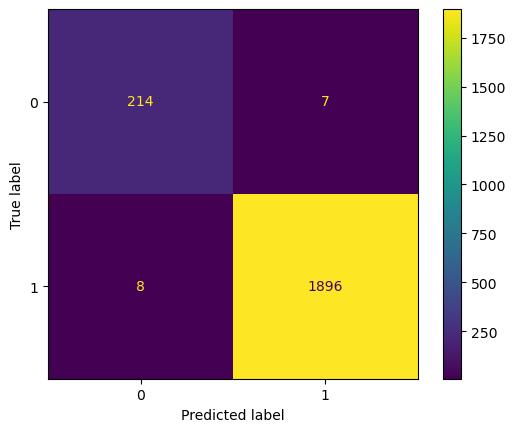

In [11]:
# checking confusion matrix, not needed just made me feel better 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# Making ROS data

In [12]:
# from collections import Counter
# from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train_ros, Y_train_ros = ros.fit_resample(X_train, Y_train)

print(X_train_ros.shape)
print(Y_train_ros.shape)

(7498, 1084)
(7498,)


([<matplotlib.patches.Wedge at 0x2482cc49570>,
 [Text(6.735557395310444e-17, 1.1, 'malware'),
  Text(-2.0206672185931328e-16, -1.1, 'benign')])

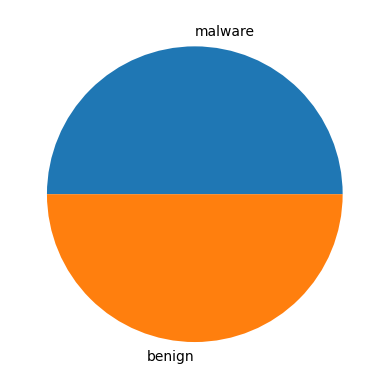

In [13]:
labels = 'malware', 'benign'

Y_train_ros.value_counts()

fig, ax = plt.subplots()
ax.pie(Y_train_ros.value_counts(), labels = labels)

In [14]:
# make our decision tree with ROS 
clf_ros = tree.DecisionTreeClassifier(criterion='entropy')
clf_ros = clf_ros.fit(X_train_ros, Y_train_ros)

In [15]:
# so it probably overfit the model 
clf_ros.score(X_train_ros, Y_train_ros)

1.0

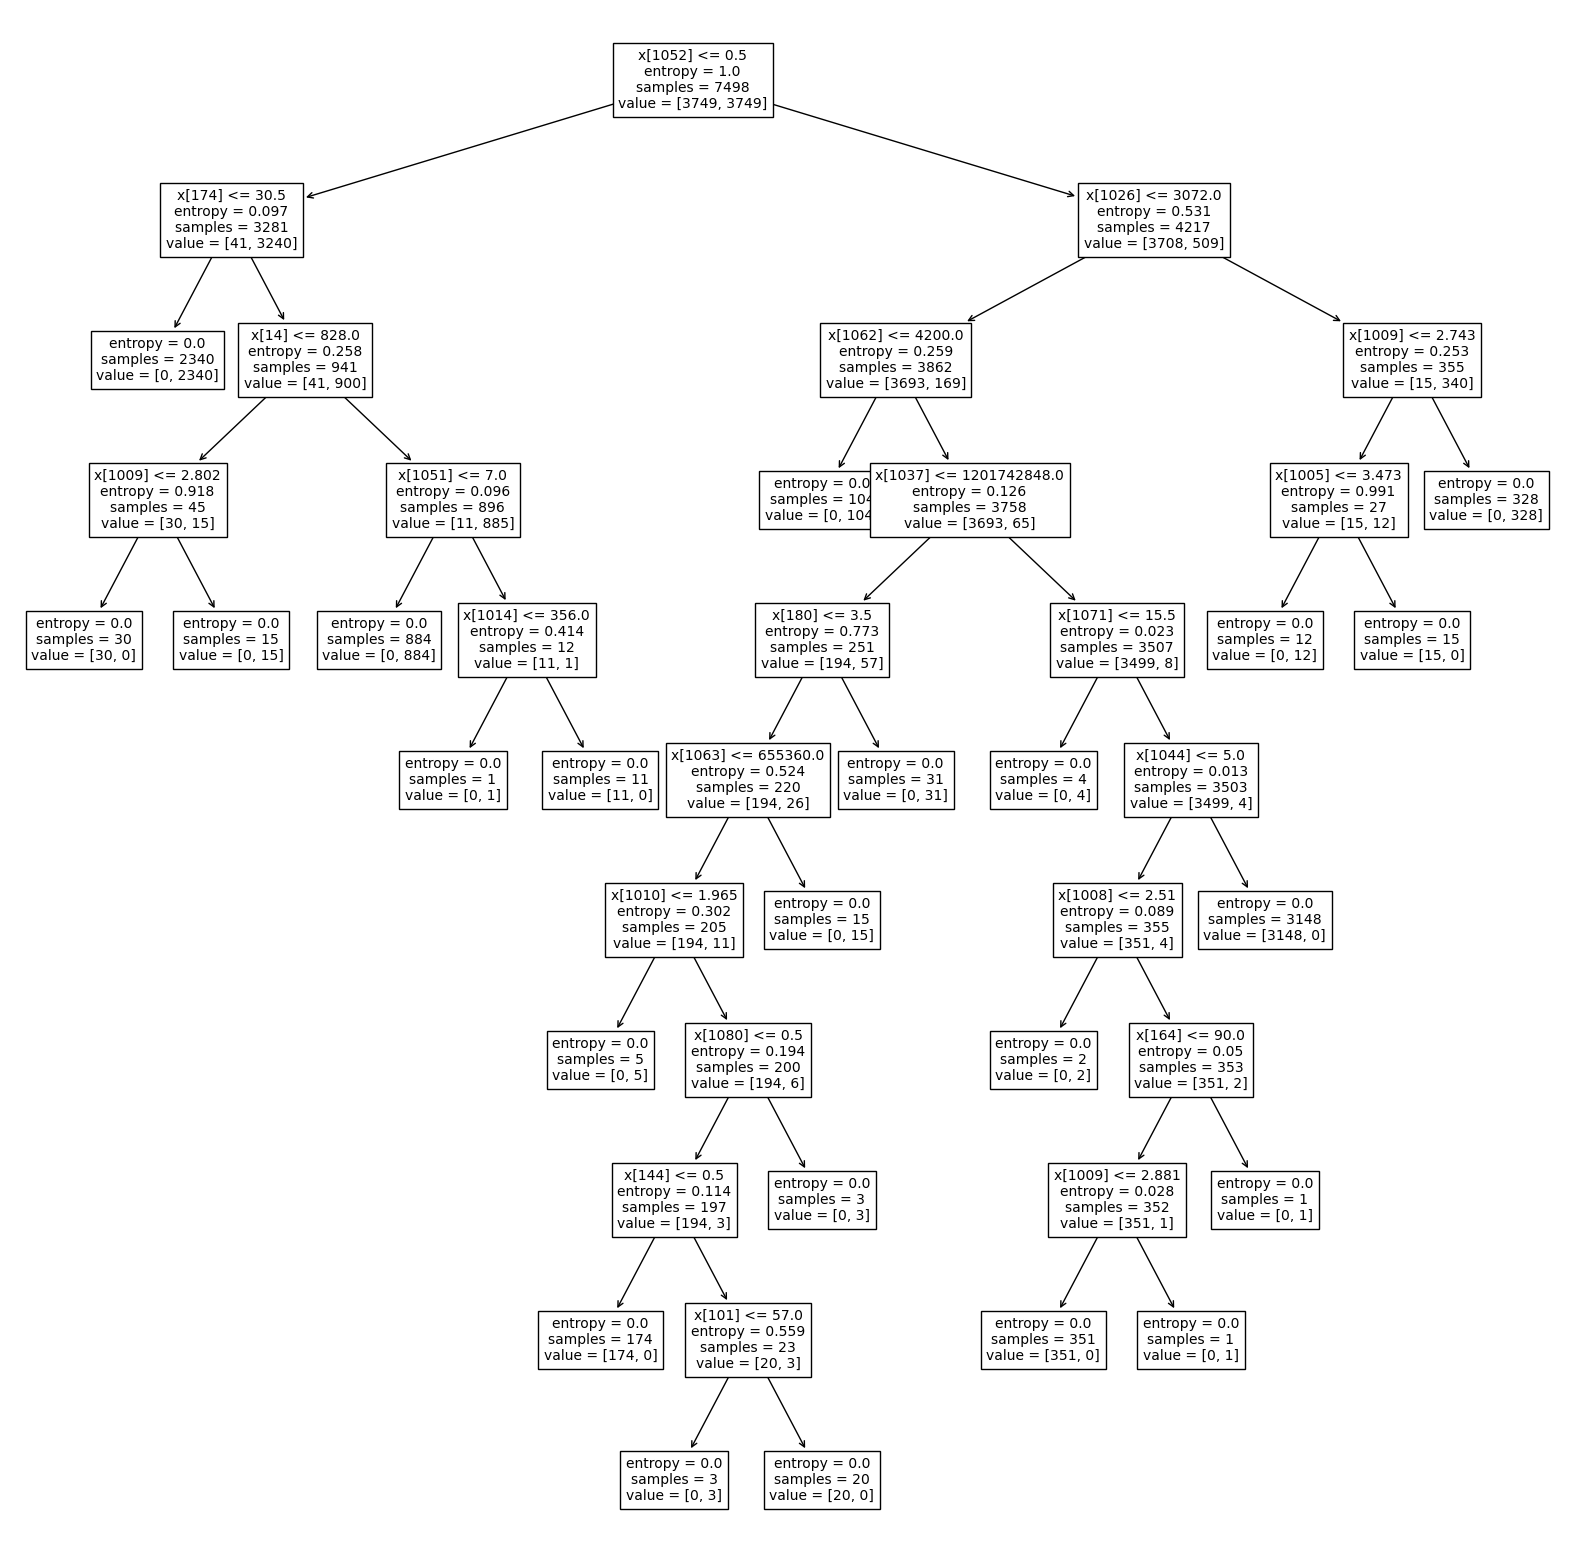

In [16]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf_ros, fontsize=10)
plt.show()

In [17]:
# METRICS!!
predictions = clf_ros.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, predictions)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)
auc = metrics.auc(fpr, tpr)
f1 = metrics.f1_score(Y_test, predictions, pos_label = 0)
precision = metrics.precision_score(Y_test, predictions, pos_label = 0)
recall = metrics.recall_score(Y_test, predictions, pos_label = 0)

df.loc[len(df.index)] = ["DT", "ROS", "", accuracy, auc, f1, precision, recall] 
df

,Algo,Balance Strategy,Parameters,Accuracy,AUC,F1-Score,Precision,Recall
0,DT,unbalanced,,0.992941,0.982062,0.966140,0.963964,0.968326
1,DT,ROS,,0.992471,0.983799,0.964126,0.955556,0.972851


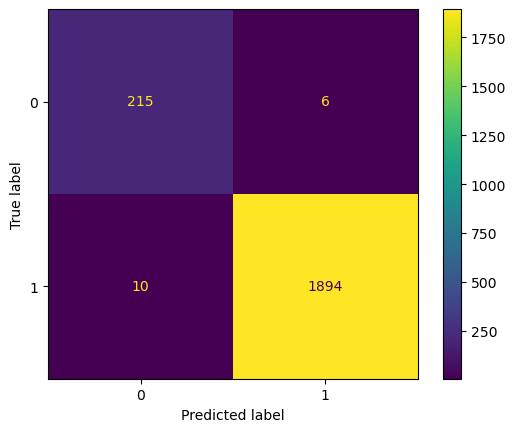

In [18]:
# CONFUSION MATRIX
cm = confusion_matrix(Y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# Making SMOTE DATA

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_smote, Y_train_smote = sm.fit_resample(X_train, Y_train)

print(X_train_smote.shape)
print(Y_train_smote.shape)


(7498, 1084)
(7498,)


([<matplotlib.patches.Wedge at 0x2482cd24fa0>,
 [Text(6.735557395310444e-17, 1.1, 'malware'),
  Text(-2.0206672185931328e-16, -1.1, 'benign')])

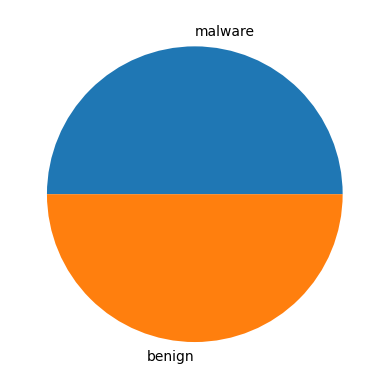

In [20]:
# the Pie chart
labels = 'malware', 'benign'

Y_train_smote.value_counts()

fig, ax = plt.subplots()
ax.pie(Y_train_ros.value_counts(), labels = labels)

In [21]:
# make our decision tree with SMOTE 
clf_smote = tree.DecisionTreeClassifier(criterion='entropy')
clf_smote = clf_smote.fit(X_train_smote, Y_train_smote)

clf_smote.score(X_train_smote, Y_train_smote)

1.0

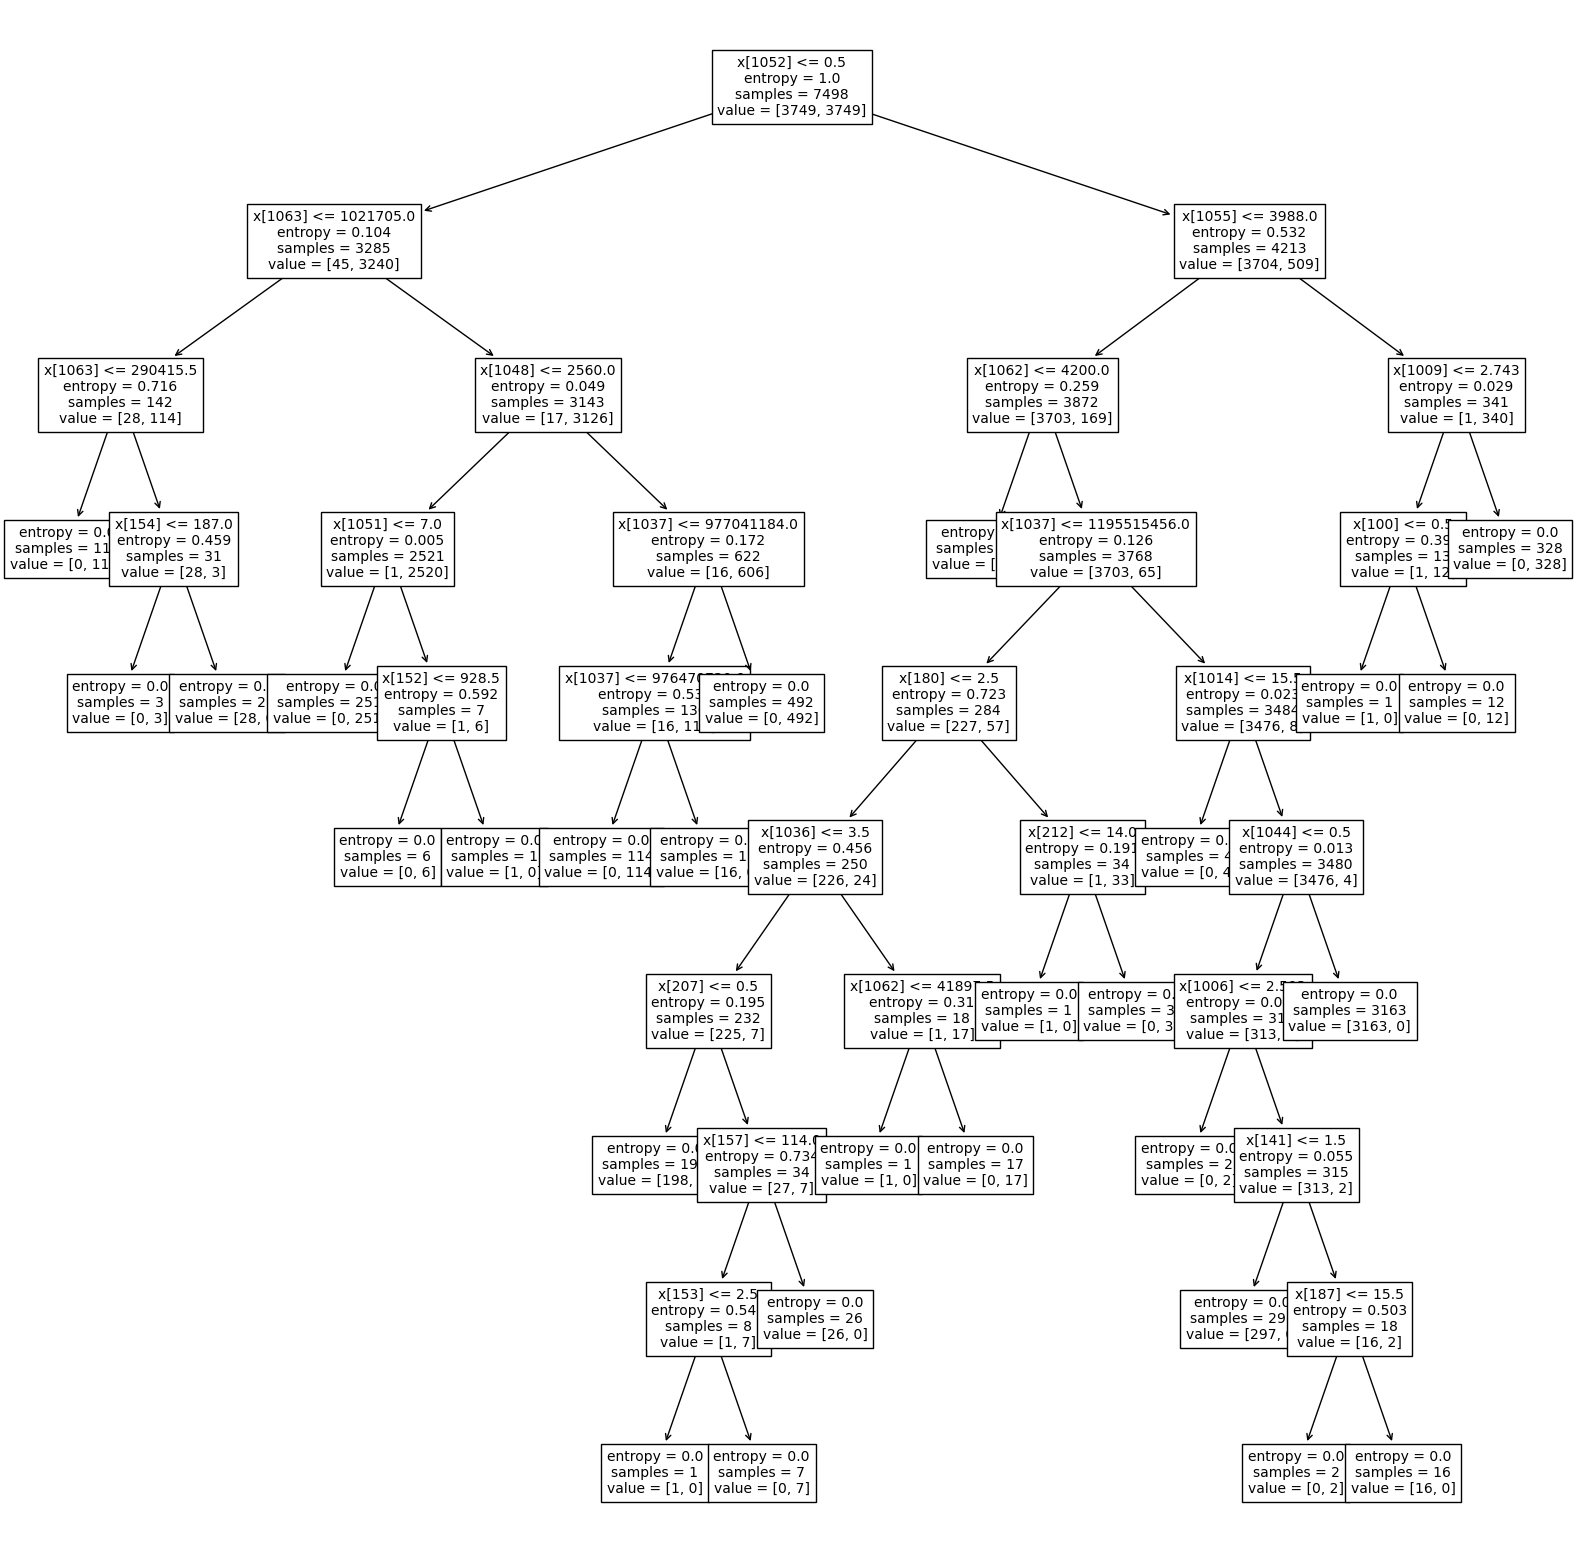

In [22]:
# plting the tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf_smote, fontsize=10)
plt.show()

In [23]:
# METRICS!!
predictions = clf_smote.predict(X_test)


accuracy = metrics.accuracy_score(Y_test, predictions)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)
auc = metrics.auc(fpr, tpr)
f1 = metrics.f1_score(Y_test, predictions, pos_label = 0)
precision = metrics.precision_score(Y_test, predictions, pos_label = 0)
recall = metrics.recall_score(Y_test, predictions, pos_label = 0)

df.loc[len(df.index)] = ["DT", "SMOTE", "", accuracy, auc, f1, precision, recall] 
df

,Algo,Balance Strategy,Parameters,Accuracy,AUC,F1-Score,Precision,Recall
0,DT,unbalanced,,0.992941,0.982062,0.966140,0.963964,0.968326
1,DT,ROS,,0.992471,0.983799,0.964126,0.955556,0.972851
2,DT,SMOTE,,0.993412,0.986324,0.968610,0.960000,0.977376


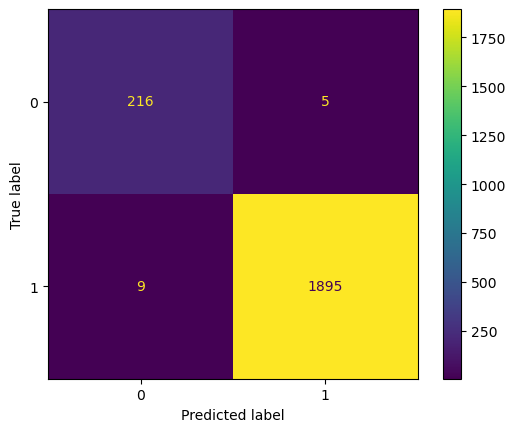

In [24]:
# CONFUSION MATRIX
cm = confusion_matrix(Y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# Starting Random forest 

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 10 , random_state=0)
clf.fit(X_train, Y_train)

clf.score(X_train, Y_train)

0.9997574581615328

In [26]:
# METRICS!!
predictions = clf.predict(X_test)


accuracy = metrics.accuracy_score(Y_test, predictions)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)
auc = metrics.auc(fpr, tpr)
f1 = metrics.f1_score(Y_test, predictions, pos_label = 0)
precision = metrics.precision_score(Y_test, predictions, pos_label = 0)
recall = metrics.recall_score(Y_test, predictions, pos_label = 0)

df.loc[len(df.index)] = ["RF", "Unbalanced", "10 Trees", accuracy, auc, f1, precision, recall] 
df

,Algo,Balance Strategy,Parameters,Accuracy,AUC,F1-Score,Precision,Recall
0,DT,unbalanced,,0.992941,0.982062,0.966140,0.963964,0.968326
1,DT,ROS,,0.992471,0.983799,0.964126,0.955556,0.972851
2,DT,SMOTE,,0.993412,0.986324,0.968610,0.960000,0.977376
3,RF,Unbalanced,10 Trees,0.990118,0.962488,0.951276,0.976190,0.927602


In [27]:
# finally used a function
def rf(trees):

    clf_rf_smote = RandomForestClassifier(n_estimators = trees , random_state=0)
    clf_rf_smote.fit(X_train_smote, Y_train_smote)

    clf_rf_smote.score(X_train_smote, Y_train_smote)

    predictions = clf_rf_smote.predict(X_test)


    accuracy = metrics.accuracy_score(Y_test, predictions)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)
    auc = metrics.auc(fpr, tpr)
    f1 = metrics.f1_score(Y_test, predictions, pos_label = 0)
    precision = metrics.precision_score(Y_test, predictions, pos_label = 0)
    recall = metrics.recall_score(Y_test, predictions, pos_label = 0)

    df.loc[len(df.index)] = ["RF", "SMOTE", str(trees) + ' trees' , accuracy, auc, f1, precision, recall] 
    df
    
rf(5)
rf(10)
rf(20)

In [28]:
df

,Algo,Balance Strategy,Parameters,Accuracy,AUC,F1-Score,Precision,Recall
0,DT,unbalanced,,0.992941,0.982062,0.966140,0.963964,0.968326
1,DT,ROS,,0.992471,0.983799,0.964126,0.955556,0.972851
2,DT,SMOTE,,0.993412,0.986324,0.968610,0.960000,0.977376
3,RF,Unbalanced,10 Trees,0.990118,0.962488,0.951276,0.976190,0.927602
4,RF,SMOTE,5 trees,0.991059,0.977012,0.957111,0.954955,0.959276
5,RF,SMOTE,10 trees,0.989176,0.985961,0.949672,0.919492,0.981900
6,RF,SMOTE,20 trees,0.992471,0.985799,0.964286,0.951542,0.977376


In [29]:
# assuming max features is the same as features 
def rf(trees, features):

    clf_rf_smote = RandomForestClassifier(n_estimators = trees, max_features = features, random_state=0)
    clf_rf_smote.fit(X_train_smote, Y_train_smote)

    clf_rf_smote.score(X_train_smote, Y_train_smote)

    predictions = clf_rf_smote.predict(X_test)


    accuracy = metrics.accuracy_score(Y_test, predictions)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)
    auc = metrics.auc(fpr, tpr)
    f1 = metrics.f1_score(Y_test, predictions, pos_label = 0)
    precision = metrics.precision_score(Y_test, predictions, pos_label = 0)
    recall = metrics.recall_score(Y_test, predictions, pos_label = 0)

    df.loc[len(df.index)] = ["RF", "SMOTE", str(trees) + " trees, " + str(features) + " features" , accuracy, auc, f1, precision, recall] 
    df
    
rf(10, 5)
rf(10, 10)
rf(10, 20)
rf(10, 40)
rf(10, 100)
df

,Algo,Balance Strategy,Parameters,Accuracy,AUC,F1-Score,Precision,Recall
0,DT,unbalanced,,0.992941,0.982062,0.966140,0.963964,0.968326
1,DT,ROS,,0.992471,0.983799,0.964126,0.955556,0.972851
2,DT,SMOTE,,0.993412,0.986324,0.968610,0.960000,0.977376
3,RF,Unbalanced,10 Trees,0.990118,0.962488,0.951276,0.976190,0.927602
4,RF,SMOTE,5 trees,0.991059,0.977012,0.957111,0.954955,0.959276
5,RF,SMOTE,10 trees,0.989176,0.985961,0.949672,0.919492,0.981900
6,RF,SMOTE,20 trees,0.992471,0.985799,0.964286,0.951542,0.977376
7,RF,SMOTE,"10 trees, 5 features",0.983529,0.970810,0.923414,0.894068,0.954751
8,RF,SMOTE,"10 trees, 10 features",0.985412,0.981860,0.933045,0.892562,0.977376
9,RF,SMOTE,"10 trees, 20 features",0.987765,0.983173,0.943231,0.911392,0.977376


# Nearest Neighbor

In [30]:
# UNBLANCED DATA
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(X_train, Y_train)

predictions = neigh.predict(X_test)


accuracy = metrics.accuracy_score(Y_test, predictions)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)
auc = metrics.auc(fpr, tpr)
f1 = metrics.f1_score(Y_test, predictions, pos_label = 0)
precision = metrics.precision_score(Y_test, predictions, pos_label = 0)
recall = metrics.recall_score(Y_test, predictions, pos_label = 0)

df.loc[len(df.index)] = ["kNN", "Unbalanced", "" , accuracy, auc, f1, precision, recall] 

df

,Algo,Balance Strategy,Parameters,Accuracy,AUC,F1-Score,Precision,Recall
0,DT,unbalanced,,0.992941,0.982062,0.966140,0.963964,0.968326
1,DT,ROS,,0.992471,0.983799,0.964126,0.955556,0.972851
2,DT,SMOTE,,0.993412,0.986324,0.968610,0.960000,0.977376
3,RF,Unbalanced,10 Trees,0.990118,0.962488,0.951276,0.976190,0.927602
4,RF,SMOTE,5 trees,0.991059,0.977012,0.957111,0.954955,0.959276
5,RF,SMOTE,10 trees,0.989176,0.985961,0.949672,0.919492,0.981900
6,RF,SMOTE,20 trees,0.992471,0.985799,0.964286,0.951542,0.977376
7,RF,SMOTE,"10 trees, 5 features",0.983529,0.970810,0.923414,0.894068,0.954751
8,RF,SMOTE,"10 trees, 10 features",0.985412,0.981860,0.933045,0.892562,0.977376
9,RF,SMOTE,"10 trees, 20 features",0.987765,0.983173,0.943231,0.911392,0.977376


In [31]:
# ROS DATA
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(X_train_ros, Y_train_ros)

predictions = neigh.predict(X_test)


accuracy = metrics.accuracy_score(Y_test, predictions)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)
auc = metrics.auc(fpr, tpr)
f1 = metrics.f1_score(Y_test, predictions, pos_label = 0)
precision = metrics.precision_score(Y_test, predictions, pos_label = 0)
recall = metrics.recall_score(Y_test, predictions, pos_label = 0)

df.loc[len(df.index)] = ["kNN", "ROS", "" , accuracy, auc, f1, precision, recall] 

df

,Algo,Balance Strategy,Parameters,Accuracy,AUC,F1-Score,Precision,Recall
0,DT,unbalanced,,0.992941,0.982062,0.966140,0.963964,0.968326
1,DT,ROS,,0.992471,0.983799,0.964126,0.955556,0.972851
2,DT,SMOTE,,0.993412,0.986324,0.968610,0.960000,0.977376
3,RF,Unbalanced,10 Trees,0.990118,0.962488,0.951276,0.976190,0.927602
4,RF,SMOTE,5 trees,0.991059,0.977012,0.957111,0.954955,0.959276
5,RF,SMOTE,10 trees,0.989176,0.985961,0.949672,0.919492,0.981900
6,RF,SMOTE,20 trees,0.992471,0.985799,0.964286,0.951542,0.977376
7,RF,SMOTE,"10 trees, 5 features",0.983529,0.970810,0.923414,0.894068,0.954751
8,RF,SMOTE,"10 trees, 10 features",0.985412,0.981860,0.933045,0.892562,0.977376
9,RF,SMOTE,"10 trees, 20 features",0.987765,0.983173,0.943231,0.911392,0.977376


In [32]:
# SMOTE with a function

def knn(k):

    neigh = KNeighborsClassifier(n_neighbors = k)
    neigh.fit(X_train_smote, Y_train_smote)

    predictions = neigh.predict(X_test)


    accuracy = metrics.accuracy_score(Y_test, predictions)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)
    auc = metrics.auc(fpr, tpr)
    f1 = metrics.f1_score(Y_test, predictions, pos_label = 0)
    precision = metrics.precision_score(Y_test, predictions, pos_label = 0)
    recall = metrics.recall_score(Y_test, predictions, pos_label = 0)

    df.loc[len(df.index)] = ["kNN", "SMOTE", "k="+str(k), accuracy, auc, f1, precision, recall]

knn(1)
knn(3)
knn(5)
knn(10)
knn(20)

df

,Algo,Balance Strategy,Parameters,Accuracy,AUC,F1-Score,Precision,Recall
0,DT,unbalanced,,0.992941,0.982062,0.966140,0.963964,0.968326
1,DT,ROS,,0.992471,0.983799,0.964126,0.955556,0.972851
2,DT,SMOTE,,0.993412,0.986324,0.968610,0.960000,0.977376
3,RF,Unbalanced,10 Trees,0.990118,0.962488,0.951276,0.976190,0.927602
4,RF,SMOTE,5 trees,0.991059,0.977012,0.957111,0.954955,0.959276
5,RF,SMOTE,10 trees,0.989176,0.985961,0.949672,0.919492,0.981900
6,RF,SMOTE,20 trees,0.992471,0.985799,0.964286,0.951542,0.977376
7,RF,SMOTE,"10 trees, 5 features",0.983529,0.970810,0.923414,0.894068,0.954751
8,RF,SMOTE,"10 trees, 10 features",0.985412,0.981860,0.933045,0.892562,0.977376
9,RF,SMOTE,"10 trees, 20 features",0.987765,0.983173,0.943231,0.911392,0.977376


In [33]:
# so here we are just getting the total average of all our scores
col = df.iloc[:, 4:8].mean(axis=1)
df["Average"] = col
# and then sorting them by the highest average score
df.sort_values(by=['Average'], ascending = False)
# our unbalanced decesion tree comes out on top looking like our best model, thougg
# maybe this is supposed to be tested again like we do with the validation set..
# I am not entirely sure 

,Algo,Balance Strategy,Parameters,Accuracy,AUC,F1-Score,Precision,Recall,Average
2,DT,SMOTE,,0.993412,0.986324,0.968610,0.960000,0.977376,0.973077
0,DT,unbalanced,,0.992941,0.982062,0.966140,0.963964,0.968326,0.970123
6,RF,SMOTE,20 trees,0.992471,0.985799,0.964286,0.951542,0.977376,0.969751
1,DT,ROS,,0.992471,0.983799,0.964126,0.955556,0.972851,0.969083
4,RF,SMOTE,5 trees,0.991059,0.977012,0.957111,0.954955,0.959276,0.962088
11,RF,SMOTE,"10 trees, 100 features",0.989647,0.984223,0.951542,0.927039,0.977376,0.960045
5,RF,SMOTE,10 trees,0.989176,0.985961,0.949672,0.919492,0.981900,0.959256
10,RF,SMOTE,"10 trees, 40 features",0.987765,0.985173,0.943478,0.907950,0.981900,0.954625
3,RF,Unbalanced,10 Trees,0.990118,0.962488,0.951276,0.976190,0.927602,0.954389
9,RF,SMOTE,"10 trees, 20 features",0.987765,0.983173,0.943231,0.911392,0.977376,0.953793


# SELECTING BEST FEATURES

In [34]:
# Another way of getting best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_train, Y_train)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

                        Specs         Score
1067               image_base  1.312271e+10
1062                 CheckSum  8.620803e+09
1038  pointer_to_symbol_table  2.523098e+09
1039        number_of_symbols  1.001088e+09
1012                 filesize  3.920377e+08


In [35]:
# NOt entirely sure whats is going on but it seems to be working 
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

SPercentile = SelectPercentile(score_func = f_regression, percentile=.465)
SPercentile = SPercentile.fit(X_train,Y_train)

# cols = SPercentile.get_support(indices=True)
# cols
# features = X_train.columns[cols]
# features

dfscores = pd.DataFrame(SPercentile.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

# SPercentile.get_feature_names_out()
# SPercentile.scores_

                               Specs        Score
1053         major_subsystem_version  1500.674925
1057             dll_characteristics   789.062326
1049  major_operating_system_version   705.277016
1056                       subsystem   231.747958
75                            .text:   190.621028
